# Producing single peaked, skewed idealised profiles
## Background
It is standard practice in flood modelling to use design rainfall profiles generated by FEH/ReFH2. We are interested in examining whether distributing rainfall over time in multiple peaks, rather than just one, will result in a different flooding outcome. 

## Constructing synthetic multiple peaked events
The FEH single-peak profiles are always produced with a single peak which can be characterised by:
1) The total corresponding rainfall volume $V$.  
2) The duration $d$ (start to end).  
3) The shape of the peak, defined here: https://refhdocs.hydrosolutions.co.uk/Design-DDF-Rainfall-Hyetographs/Design-Storm-Profiles/  

TBC....

In [6]:
from datetime import datetime, timedelta
import pandas as pd
from dateutil.relativedelta import relativedelta
import sys
import matplotlib.patches as mpatches
from matplotlib import dates as mdates
import re
sys.path.insert(1, '../')
from Functions import *

### Define the different methods 

In [7]:
methods =['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9']
colors = ['darkblue']*2 + ['paleturquoise']*2 + ['grey']+ ['indianred']*2+['darkred']*2

duration = '6h'
N_subpeaks = 1
default_peak_shape='refh2-summer'
total_mm_accum=59.29
total_duration_minutes = (int(duration[0]) * 60) +1
subpeak_duration_minutes=total_duration_minutes/6

# Create datetimes to go with values
start = datetime(2022,8,1,0,0,0)
end = start + relativedelta(hours=int(duration[0]))
end = end - timedelta(minutes=1) 

if total_duration_minutes == (int(duration[0]) * 60) +1:
    seconds = (end - start).total_seconds() + 61
else:    
    seconds = (end - start).total_seconds() + 60 
step = timedelta(minutes=1)
datetimes = []
for i in range(0, int(seconds), int(step.total_seconds())):
    datetimes.append(start + timedelta(seconds=i))       

### Create dataframe for one method containing the accumulation and rate at each minute of time

In [29]:
# For each method produce a dataframe containing precipitation values for each minute and save these to file
for method in methods:

    # Get profile peak before frac parameter
    if len(re.findall("\d+\.\d+", method))>0:
        peak_before_frac = float(re.findall("\d+\.\d+", method)[0])
    else:
        peak_before_frac = 0.5

    # Find accumulation and rate
    accum, rate = calc_rainfall_curves(method,total_mm_accum,total_duration_minutes,N_subpeaks,
                                       subpeak_duration_minutes,peak_before_frac)
    # Create as dataframe
    accum_df = pd.DataFrame({'Dates': datetimes,  'Rate (mm/hr)': rate, 'Rate (mm/min)': rate/60})
    # Keep only columns needed for feeding to ReFH2
    accum_df = accum_df[['Dates','Rate (mm/min)']]

    # Write to csv
    accum_df.to_csv("{}r_100yrRP/PreLossRemoval/{}.csv".format(duration, method),header = False, index = False)

    # Print 
    # print(method + ". Max rainfall rate: " + str(round(accum_df['Rate (mm/min)'].max(),2)) + "mm/min")
    # print("Total rainfall in event: " + str(round(accum_df['Rate (mm/min)'].sum(),2)) + "mm")

### Create a dataframe sepecifying the volume of rainfall within each 5th of the event
Also the max value in each 5th (to check whether the fifth where the peak in intensity occurs, is the same as where the greatest volume is)

In [ ]:
# breaks = range(0,360,72)
# rainfall_volume_df = pd.DataFrame()
# rainfall_peak_df = pd.DataFrame()

# for num, method in enumerate(methods):
#     # Read in post loss removal rainfall data
#     post_loss_removal = pd.read_csv('../IdealisedProfiles/' + "6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(method))
#     # Format time column
#     post_loss_removal = clean_dfs(post_loss_removal)
#     # Create a list containing the total rainfall rate in each chunk of time 
#     rainfall_volume_ls =[]
#     rainfall_peak_ls = []
#     for i in breaks:
#         rainfall_volume_ls.append(post_loss_removal.iloc[i:(i+72)]['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'].sum())
#         rainfall_peak_ls.append(post_loss_removal.iloc[i:(i+72)]['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'].max())
#     rainfall_volume_df[method] = rainfall_volume_ls
#     rainfall_peak_df[method] = rainfall_peak_ls
    
# rainfall_volume_df.loc['Total']= rainfall_volume_df.sum()

## Plot pre loss removal profiles

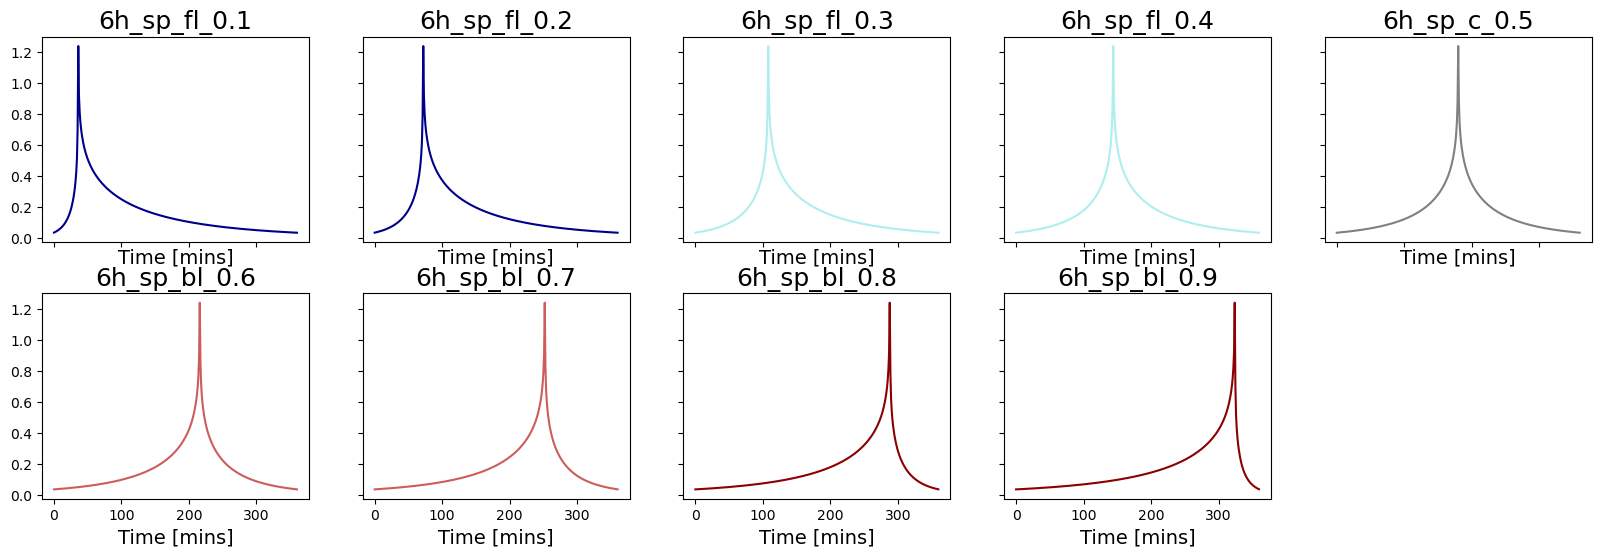

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize = (20,6), sharex = True, sharey = True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

for number, ax in enumerate(axs.reshape(-1)): 
    if number <9:
        plot_profile_shape_prelossremoval(ax, methods[number], total_duration_minutes, "../IdealisedProfiles/", color = colors[number])
    elif number == 9:
        ax.axis('off')

## Plot post loss removal profiles 

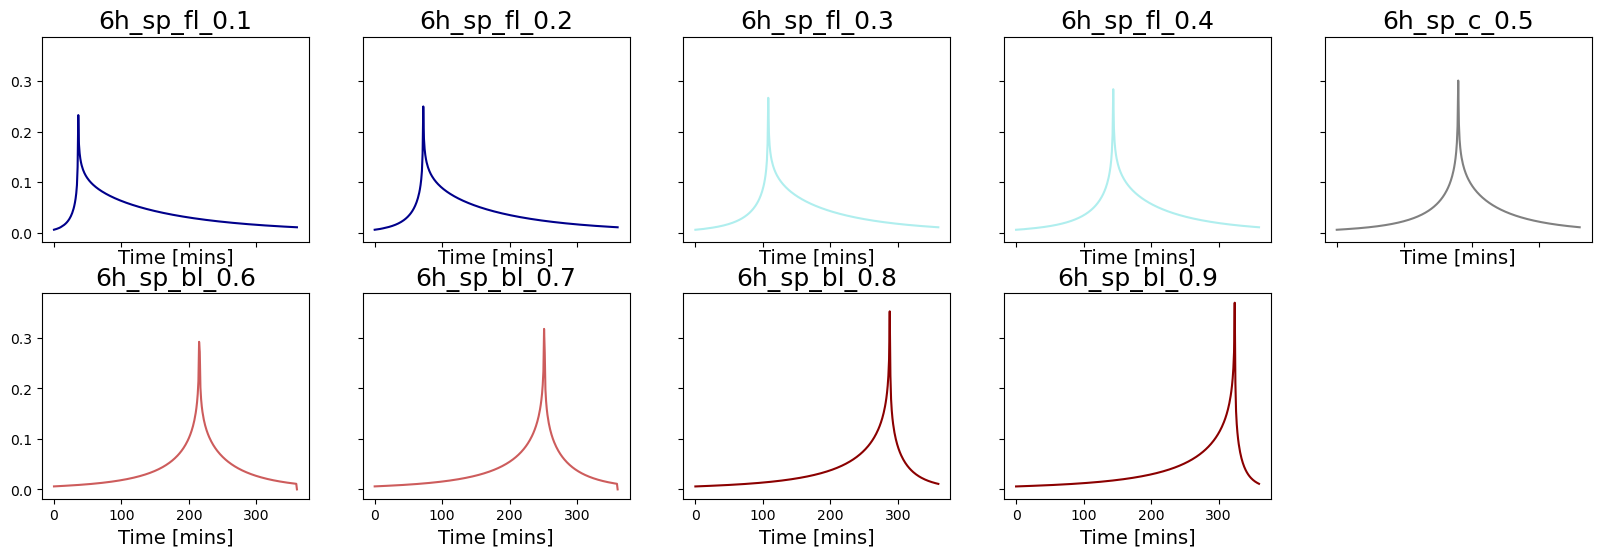

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize = (20,6), sharex = True, sharey = True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

for number, ax in enumerate(axs.reshape(-1)): 
    if number <9:
        plot_profile_shape_postlossremoval(ax, methods[number], total_duration_minutes,
                                           "../IdealisedProfiles/", color = colors[number])
    elif number == 9:
        ax.axis('off')        

## Plotting

### Plot the loss removal

In [14]:
# # Create figure
# fig, axes = plt.subplots(3, len(methods), figsize=(18,4), sharex =True, sharey = 'row')

# for axes_number, method in enumerate(methods):
#     pre_loss_removal = pd.read_csv('../IdealisedProfiles/' + "6hr_100yrRP/PreLossRemoval/{}.csv".format(method), names = ['Time', 'Rainfall'])
#     post_loss_removal = pd.read_csv('../IdealisedProfiles/' + "6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(method))
    
#     post_loss_removal['losses'] =(post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model']/post_loss_removal['Observed rainfall - 01/08/2022 00:00'])   

#     # Plot pre loss removal rainfall
#     axes[0, axes_number].plot(np.array(range(total_duration_minutes))+0.5, post_loss_removal['Urban net rain mm (Observed rainfall - 01/08/2022) - urbanised model'], color = colors[axes_number])
#     # plot the amount of losses remove
#     axes[1, axes_number].plot(np.array(range(total_duration_minutes))+0.5, post_loss_removal['losses'], color = colors[axes_number])
#     # plot the post loss removal rate
#     axes[2, axes_number].plot(np.array(range(total_duration_minutes))+0.5, post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'], color = colors[axes_number])
    
# fig.text(0.5, -0.05, 'Minute', ha='center', size =16);
# fig.text(0.08, 0.7, 'Losses removed (mm)', va='center', rotation='vertical', size = 10);
# # fig.text(0.08, 0.7, 'Cumulative\n rainfall (mm)', va='center', rotation='vertical', size = 10);
# fig.text(0.08, 0.3, 'Rainfall rate\n (mm/min)', va='center', rotation='vertical', size = 10);    

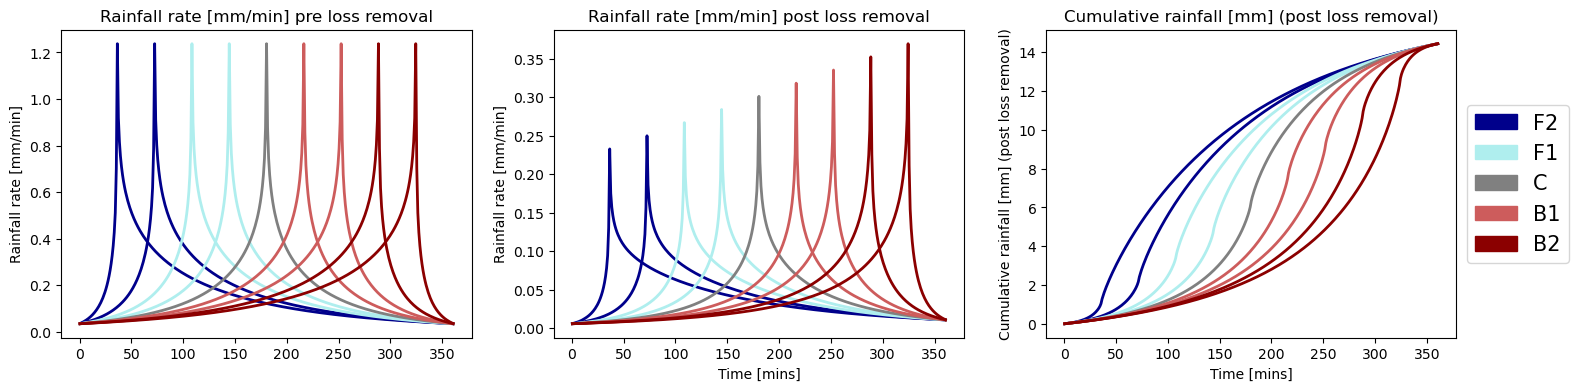

In [33]:
fig, axes = plt.subplots(1, 3,figsize=(18,4), sharex =True, sharey = False)
colors = ['darkblue']*2 + ['paleturquoise']*2 + ['grey']+ ['indianred']*2+['darkred']*2
for axes_number, method in enumerate(methods):
    # Read in data
    pre_loss_removal = pd.read_csv('../IdealisedProfiles/' + "6hr_100yrRP/PreLossRemoval/{}.csv".format(method), names = ['Time', 'Rainfall'])
    post_loss_removal = pd.read_csv('../IdealisedProfiles/' + "6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(method))
    
    # Calculate the cumulative rainfall 
    post_loss_removal['cumulative_rainfall_this_min'] = post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'].cumsum()
    
    # Plot pre loss removal rainfall rate
    axes[0].plot(np.array(range(total_duration_minutes))+0.5,pre_loss_removal['Rainfall'], color=colors[axes_number], linewidth = 2)   
    axes[0].set_ylabel('Rainfall rate [mm/min]')
    axes[0].set_title('Rainfall rate [mm/min] pre loss removal')
    
    # Plot post loss removal rainfall rate
    axes[1].plot(np.array(range(total_duration_minutes))+0.5,post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'], color=colors[axes_number], linewidth = 2)   
    axes[1].set_xlabel('Time [mins]')
    axes[1].set_ylabel('Rainfall rate [mm/min]')
    axes[1].set_title('Rainfall rate [mm/min] post loss removal')
    
    # Plot cumulative rainfall rate
    axes[2].plot(np.array(range(total_duration_minutes))+0.5,post_loss_removal['cumulative_rainfall_this_min'], color=colors[axes_number], linewidth = 2)   
    axes[2].set_xlabel('Time [mins]')
    axes[2].set_ylabel('Cumulative rainfall [mm] (post loss removal)')
    axes[2].set_title('Cumulative rainfall [mm] (post loss removal)')
    
    # CHECK WHETHER TOTAL RAINFALL VOLUME IS CONSERVED
    #print("Max rainfall (after loss removal): ", round(post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'].max(),2))
    #print("Max rainfall (before loss removal): ", round(pre_loss_removal['Rainfall'].max(),2))
    
    #print("Total event rainfall (after loss removal): ", round(post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'].sum(),3))
    #print("Total event rainfall (before loss removal): ", round(pre_loss_removal['Rainfall'].sum(),2))
    
colors_leg = ['darkblue', 'paleturquoise', 'grey', 'indianred', 'darkred']
texts = ['F2','F1','C', 'B1', 'B2'] 
patches = [ mpatches.Patch(color=colors_leg[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.15, 0.5), loc='center', ncol=1, prop={'size': 15});
fig.savefig("6hr_100yrRP/PostLossRemoval/Profile_plots.PNG");    